# **Task-02**

**Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.**

# Exploratory-Data-Analysis-On-Pokemon-Dataset

# Import Libraries and load Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px

In [ ]:
dataset=pd.read_csv('https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/pokemon.csv',encoding='latin-1')

# Shape of the Dataset

In [ ]:
dataset.shape

(800, 15)

In [ ]:
dataset.columns

Index(['Name', 'HP', 'Attack', 'Defense', 'Sp Atk', 'Sp Def', 'Speed', 'Total',
       'HP Percentile', 'Attack Percentile', 'Defense Percentile',
       'Sp Atk Percentile', 'Sp Def Percentile', 'Speed Percentile',
       'Total Percentile'],
      dtype='object')

# Data types of Various Columns

In [ ]:
dataset.dtypes

Name                   object
HP                      int64
Attack                  int64
Defense                 int64
Sp Atk                  int64
Sp Def                  int64
Speed                   int64
Total                   int64
HP Percentile         float64
Attack Percentile     float64
Defense Percentile    float64
Sp Atk Percentile     float64
Sp Def Percentile     float64
Speed Percentile      float64
Total Percentile      float64
dtype: object

# Display a few rows

In [ ]:
dataset.head()

,Name,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,HP Percentile,Attack Percentile,Defense Percentile,Sp Atk Percentile,Sp Def Percentile,Speed Percentile,Total Percentile
0,Mewtwo (Mega Mewtwo Y),106,150,70,194,120,140,780,93.6,96.4,48.0,100.0,93.9,98.7,99.7
1,Mewtwo (Mega Mewtwo X),106,190,100,154,100,130,780,93.6,100.0,80.6,98.2,83.6,97.7,99.7
2,Rayquaza (Mega Rayquaza),105,180,100,180,100,115,780,92.3,99.4,80.6,99.6,83.6,94.1,99.7
3,Kyogre (Primal Kyogre),100,150,90,180,160,90,770,87.7,96.4,72.3,99.6,99.6,72.9,99.4
4,Groudon (Primal Groudon),100,180,160,150,90,90,770,87.7,99.4,98.4,97.1,74.3,72.9,99.4


In [ ]:
dataset.tail()

,Name,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,HP Percentile,Attack Percentile,Defense Percentile,Sp Atk Percentile,Sp Def Percentile,Speed Percentile,Total Percentile
795,Weedle,40,35,30,20,20,50,195,6.2,5.8,1.8,0.8,0.0,27.1,0.3
796,Wurmple,45,45,35,20,30,20,195,12.7,11.2,4.3,0.8,2.2,1.7,0.3
797,Kricketot,37,25,41,25,41,25,194,5.1,2.1,12.6,2.2,12.1,4.3,0.2
798,Azurill,50,20,40,20,40,20,190,18.5,0.7,8.1,0.8,8.3,1.7,0.1
799,Sunkern,30,30,30,30,30,30,180,1.3,3.2,1.8,4.0,2.2,6.5,0.0


# Check For Missing Values

In [ ]:
dataset.isnull().sum()

Name                  0
HP                    0
Attack                0
Defense               0
Sp Atk                0
Sp Def                0
Speed                 0
Total                 0
HP Percentile         0
Attack Percentile     0
Defense Percentile    0
Sp Atk Percentile     0
Sp Def Percentile     0
Speed Percentile      0
Total Percentile      0
dtype: int64

# Data Cleaning

In [ ]:
dataset.info

<bound method DataFrame.info of                          Name   HP  ...  Speed Percentile  Total Percentile
0      Mewtwo (Mega Mewtwo Y)  106  ...              98.7              99.7
1      Mewtwo (Mega Mewtwo X)  106  ...              97.7              99.7
2    Rayquaza (Mega Rayquaza)  105  ...              94.1              99.7
3      Kyogre (Primal Kyogre)  100  ...              72.9              99.4
4    Groudon (Primal Groudon)  100  ...              72.9              99.4
..                        ...  ...  ...               ...               ...
795                    Weedle   40  ...              27.1               0.3
796                   Wurmple   45  ...               1.7               0.3
797                 Kricketot   37  ...               4.3               0.2
798                   Azurill   50  ...               1.7               0.1
799                   Sunkern   30  ...               6.5               0.0

[800 rows x 15 columns]>

In [ ]:
dataset.count()

Name                  800
HP                    800
Attack                800
Defense               800
Sp Atk                800
Sp Def                800
Speed                 800
Total                 800
HP Percentile         800
Attack Percentile     800
Defense Percentile    800
Sp Atk Percentile     800
Sp Def Percentile     800
Speed Percentile      800
Total Percentile      800
dtype: int64

# Q1] Top 10 Pokemons whose HP is high and visualize it. - Bar Graph

In [ ]:
dataset[dataset['HP']>225].head(10)

,Name,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,HP Percentile,Attack Percentile,Defense Percentile,Sp Atk Percentile,Sp Def Percentile,Speed Percentile,Total Percentile
128,Blissey,255,10,10,75,135,55,540,100.0,0.2,0.2,57.9,97.4,33.9,83.3
398,Chansey,250,5,5,35,105,50,450,99.8,0.0,0.0,7.5,87.3,27.1,49.6


In [ ]:
dataset[dataset['HP']>225].sort_values('Attack')['Name'].head(10)

398    Chansey
128    Blissey
Name: Name, dtype: object

In [ ]:
df['HP'].nlargest(n=10)

NameError: ignored

# Q2] Who’s that weakling with barely any HP?

In [ ]:
dataset[dataset['HP']<10]


,Name,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,HP Percentile,Attack Percentile,Defense Percentile,Sp Atk Percentile,Sp Def Percentile,Speed Percentile,Total Percentile
773,Shedinja,1,90,45,30,30,40,236,0.0,64.8,14.5,4.0,2.2,15.8,3.2


# Q3] Who has those tremendously high Defense and Sp. Defense values?

In [ ]:
dataset[dataset['Defense']>200]

,Name,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,HP Percentile,Attack Percentile,Defense Percentile,Sp Atk Percentile,Sp Def Percentile,Speed Percentile,Total Percentile
40,Aggron (Mega Aggron),70,140,230,60,80,50,630,52.8,95.1,99.7,37.4,61.4,27.1,94.9
47,Steelix (Mega Steelix),75,125,230,55,95,30,610,62.2,89.8,99.7,31.0,79.0,6.5,94.1
221,Shuckle,20,10,230,10,230,5,505,0.2,0.2,99.7,0.0,100.0,0.0,72.0


In [ ]:
dataset[dataset['SP DEF']>200]

,NAME,HP,ATTACK,DEFENSE,SP ATK,SP DEF,SPEED,TOTAL,HP PERCENTILE,ATTACK PERCENTILE,DEFENSE PERCENTILE,SP ATK PERCENTILE,SP DEF PERCENTILE,SPEED PERCENTILE,TOTAL PERCENTILE
221,Shuckle,20,10,230,10,230,5,505,0.2,0.2,99.7,0.0,100.0,0.0,72.0


# Q4] Visualize HP

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



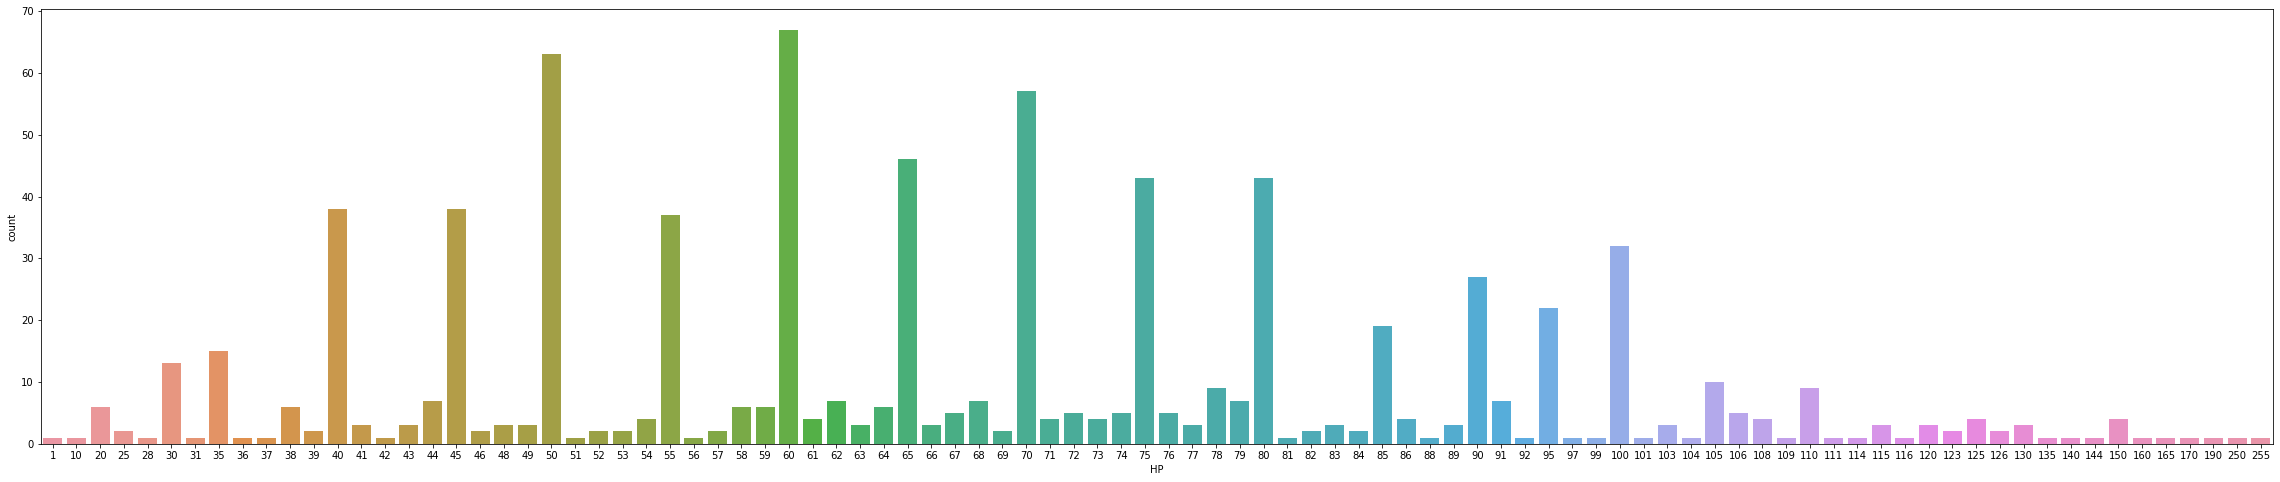

In [ ]:
plt.figure(figsize=(40,8))
sns.countplot(dataset['HP'])

# Q5] Which Speed has highest Total score?

In [ ]:
dataset= dataset.groupby('SPEED')['TOTAL'].mean().reset_index()
dataset


,SPEED,TOTAL
0,5,447.500000
1,10,295.000000
2,15,247.444444
3,20,340.933333
4,22,355.000000
...,...,...
103,140,630.000000
104,145,540.000000
105,150,601.250000
106,160,456.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

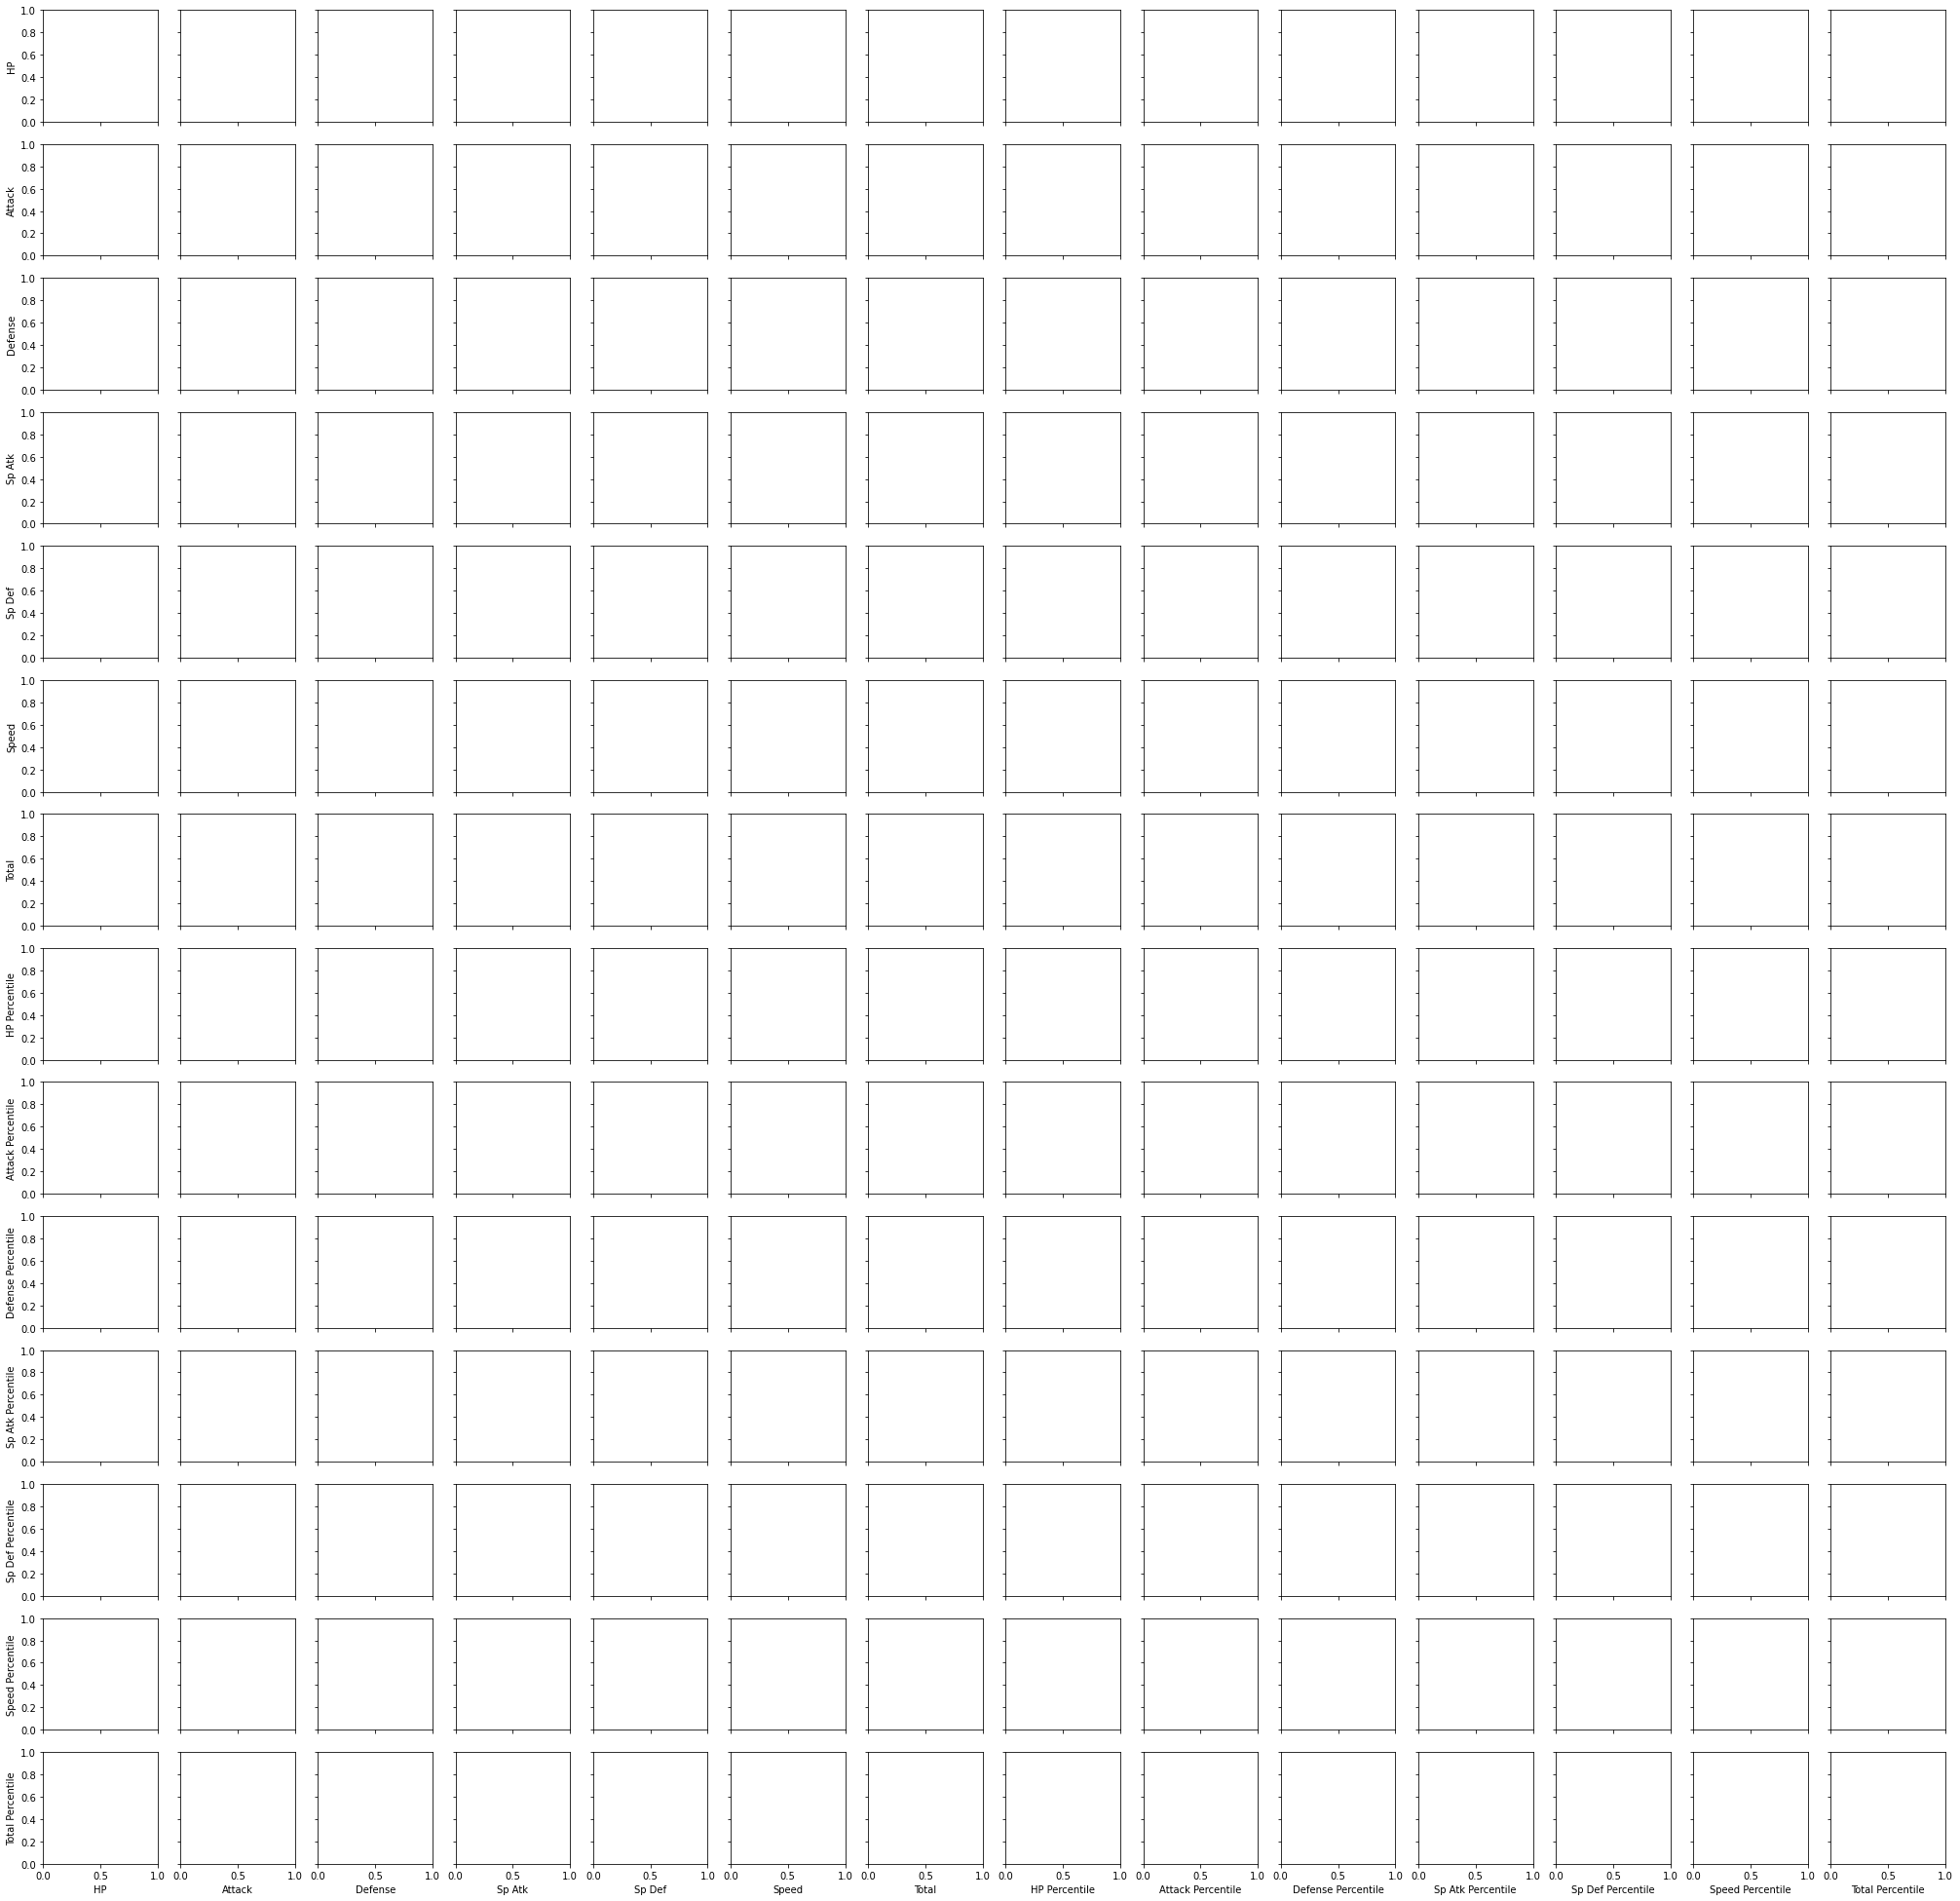

In [ ]:
sns.pairplot(dataset,['HP','Attack','Defense','Sp Atk','Sp Def','Speed']).head(10)

# Q6] Who has Attack greater than 180?

In [ ]:
dataset[dataset['Attack']>180]

,Name,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,HP Percentile,Attack Percentile,Defense Percentile,Sp Atk Percentile,Sp Def Percentile,Speed Percentile,Total Percentile
1,Mewtwo (Mega Mewtwo X),106,190,100,154,100,130,780,93.6,100.0,80.6,98.2,83.6,97.7,99.7
53,Heracross (Mega Heracross),80,185,115,40,105,75,600,70.5,99.8,89.4,12.0,87.3,59.8,89.4


# Q7] Name with their Total Score

In [ ]:
dataset= dataset.groupby('NAME')['TOTAL'].mean().reset_index()
dataset

,NAME,TOTAL
0,Abomasnow,494.0
1,Abomasnow (Mega Abomasnow),594.0
2,Abra,310.0
3,Absol,465.0
4,Absol (Mega Absol),565.0
...,...,...
795,Zoroark,510.0
796,Zorua,330.0
797,Zubat,245.0
798,Zweilous,420.0


# Q8] Printing Total of top 3 Rows

In [ ]:
dataset.sort_values('Total',ascending=False).head(3)

,Name,HP,Attack,Defense,Sp Atk,Sp Def,Speed,Total,HP Percentile,Attack Percentile,Defense Percentile,Sp Atk Percentile,Sp Def Percentile,Speed Percentile,Total Percentile
0,Mewtwo (Mega Mewtwo Y),106,150,70,194,120,140,780,93.6,96.4,48.0,100.0,93.9,98.7,99.7
2,Rayquaza (Mega Rayquaza),105,180,100,180,100,115,780,92.3,99.4,80.6,99.6,83.6,94.1,99.7
1,Mewtwo (Mega Mewtwo X),106,190,100,154,100,130,780,93.6,100.0,80.6,98.2,83.6,97.7,99.7


In [ ]:
bins=range(0,200,20) #they act as containers
plt.hist(dataset["ATTACK"],bins,histtype="bar",rwidth=1.2,color='#0ff0ff') #hist() is used to plot a histogram
plt.xlabel('ATTACK') #set the xlabel name
plt.ylabel('Count') #set the ylabel name
plt.plot()
plt.axvline(dataset['ATTACK'].mean(),linestyle='dashed',color='red') #draw a vertical line showing the average Attack value
plt.show()

KeyError: ignored

# Q9] Visualizing Correlation between speed and total using heatmap

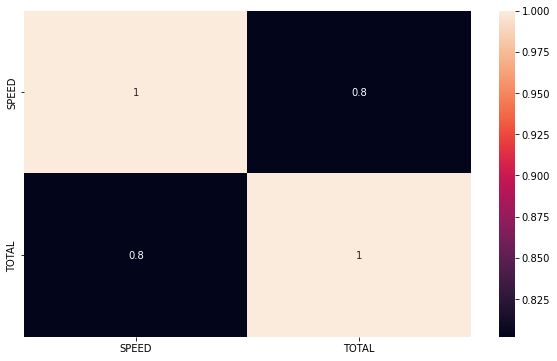

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

# Q10] Top 10 pokemons

In [ ]:
dataset[["NAME","TOTAL"]].sort_values(by= "TOTAL",ascending= False).head(10)

,NAME,TOTAL
450,Mewtwo (Mega Mewtwo Y),780.0
449,Mewtwo (Mega Mewtwo X),780.0
558,Rayquaza (Mega Rayquaza),780.0
361,Kyogre (Primal Kyogre),770.0
286,Groudon (Primal Groudon),770.0
26,Arceus,720.0
374,Latias (Mega Latias),700.0
729,Tyranitar (Mega Tyranitar),700.0
161,Diancie (Mega Diancie),700.0
363,Kyurem (Black Kyurem),700.0


# Q11] Sunkern is the least powerfull pokemon with lowest total stat of 180 followed by Azurill

In [ ]:
dataset[["NAME","TOTAL"]].sort_values(by= "TOTAL",ascending= False).tail(10)

,NAME,TOTAL
790,Magikarp,200
791,Feebas,200
792,Scatterbug,200
793,Ralts,198
794,Caterpie,195
795,Weedle,195
796,Wurmple,195
797,Kricketot,194
798,Azurill,190
799,Sunkern,180


# Q12] Top 10 fastest pokemon

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'NAME')

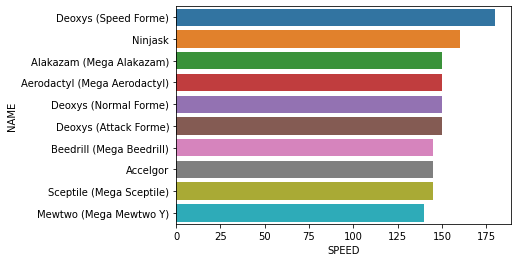

In [ ]:
x= dataset.groupby("NAME").SPEED.sum().sort_values(ascending= False).head(10)

fig= sns.barplot(x.values,x.index)
fig.set_xlabel("SPEED")
fig.set_ylabel("NAME")

#Q13] Top 10 Most defensive pokemon

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'NAME')

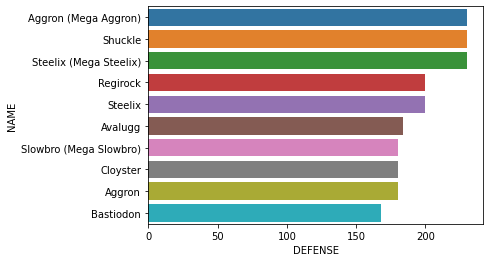

In [ ]:
y= dataset.groupby("NAME").DEFENSE.sum().sort_values(ascending= False).head(10)
fig= sns.barplot(y.values,y.index)
fig.set_xlabel("DEFENSE")
fig.set_ylabel("NAME")

#Q14] DeoxysSpeed Forme is the fastest pokemon

In [ ]:
dataset[["NAME","SPEED"]].sort_values(by= "SPEED",ascending= False).head(10)

,NAME,SPEED
62,Deoxys (Speed Forme),180
383,Ninjask,160
45,Aerodactyl (Mega Aerodactyl),150
64,Deoxys (Attack Forme),150
65,Deoxys (Normal Forme),150
86,Alakazam (Mega Alakazam),150
266,Accelgor,145
38,Sceptile (Mega Sceptile),145
253,Beedrill (Mega Beedrill),145
0,Mewtwo (Mega Mewtwo Y),140


#Q15] pokemons with best attacks

In [ ]:
dataset[["NAME","ATTACK"]].sort_values(by= "ATTACK",ascending= False).head(10)

,NAME,ATTACK
1,Mewtwo (Mega Mewtwo X),190
53,Heracross (Mega Heracross),185
64,Deoxys (Attack Forme),180
2,Rayquaza (Mega Rayquaza),180
4,Groudon (Primal Groudon),180
12,Kyurem (Black Kyurem),170
11,Garchomp (Mega Garchomp),170
260,Rampardos,165
44,Gallade (Mega Gallade),165
120,Banette (Mega Banette),165


#Q16] Attack and defense correlation

<Figure size 720x720 with 0 Axes>

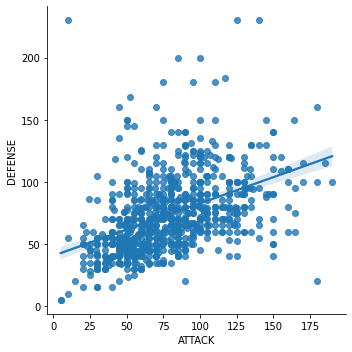

In [ ]:
plt.figure(figsize=(10,10))
sns.lmplot(data= dataset,x= "ATTACK",y= "DEFENSE")

# Q17] Visualizing Total Score using Boxplot

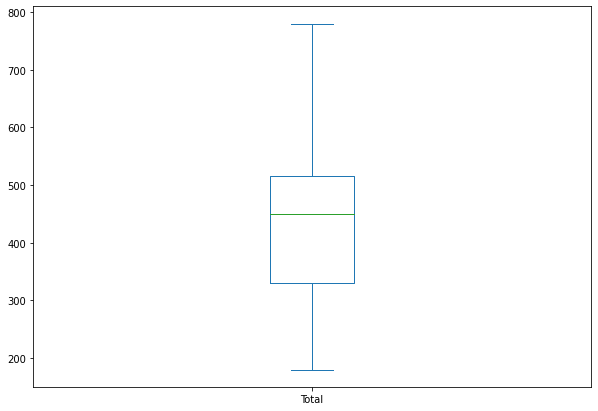

In [ ]:
fig=plt.figure(figsize=(10,7))
dataset['Total'].plot(kind='box');

#Q18] Attack Percentile & Speed Percentile Correlation

<Figure size 720x720 with 0 Axes>

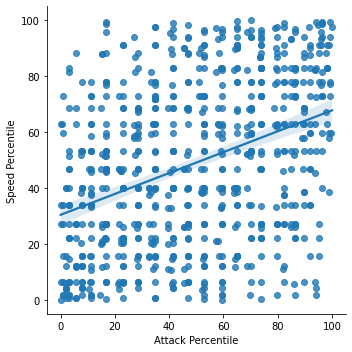

In [ ]:
plt.figure(figsize=(10,10))
sns.lmplot(data= dataset,x= "Attack Percentile",y= "Speed Percentile")

# Q19] Visualizing Dataset Using Boxplot

<Figure size 7200x7200 with 0 Axes>

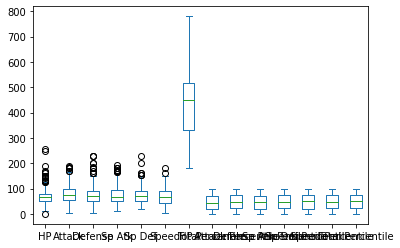

In [ ]:
fig=plt.figure(figsize=(100,100))
dataset.plot(kind='box');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f04ea628f10>,
      dtype=object)

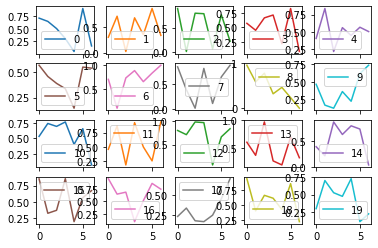

In [ ]:
df.plot(subplots=True, layout=(4,5))


# Q20] Visualizing Float Values of the Dataset

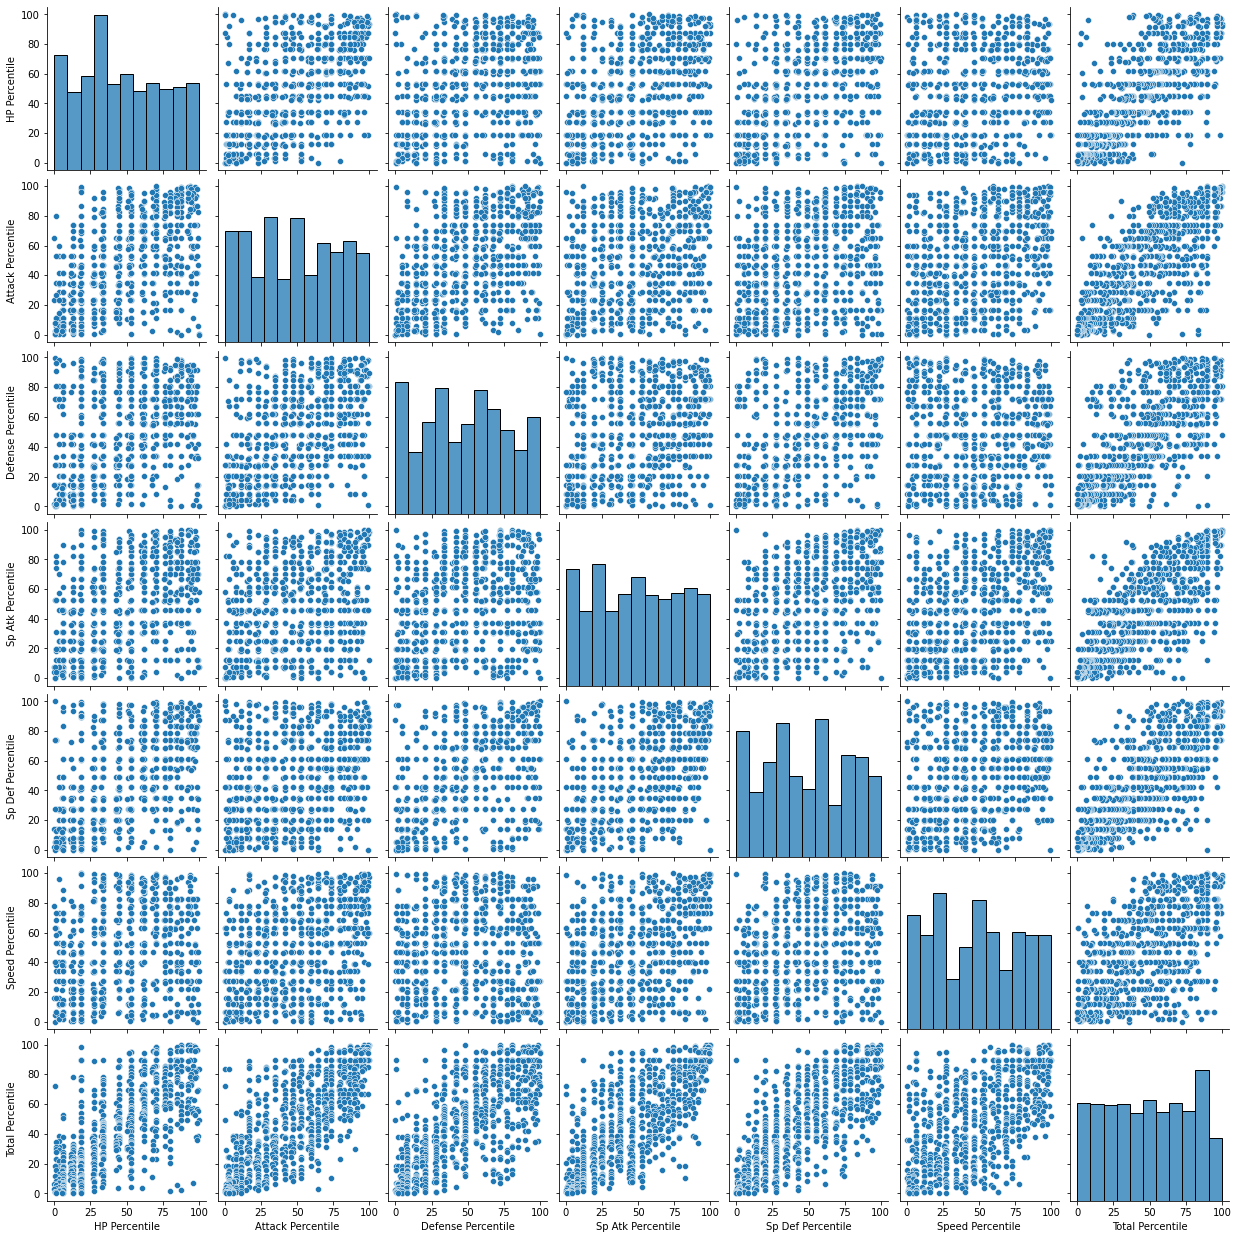

In [ ]:
sns.pairplot(dataset.loc[:,dataset.dtypes == 'float64'])

# Q21] Visualizing Dataset using Line

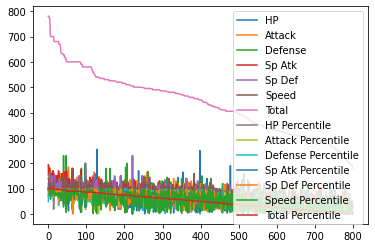

In [ ]:
ax = dataset.plot()

#Q22] Maximum HP and Defense of the Dataset

In [ ]:
print("MAx HP:",dataset['HP'].argmax())
print("Max Defense:",(dataset['Defense']).idxmax())

MAx HP: 128
Max Defense: 40


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/hxchua/datadoubleconfirm/master/datasets/pokemon.csv',encoding='latin-1')
x = dataset.Speed Percentile
y = dataset.Total Percentile
plt.scatter(x, y)
plt.show()

SyntaxError: ignored